In [1]:
# please upload domain_sentiment_data.tar.gz file here
from google.colab import files
uploaded = files.upload()

Saving domain_sentiment_data.tar.gz to domain_sentiment_data.tar.gz


In [2]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip the tar.gz file and put all the unzipped files into "domain_sentiment_data_unzip" folder
with tarfile.open("domain_sentiment_data.tar.gz", "r:*") as tar:
    tar.extractall(path='domain_sentiment_data_unzip')
    path = tar.getnames()
    

In [3]:
# check each file's name
path

['sorted_data_acl/dvd/negative.review',
 'sorted_data_acl/dvd/unlabeled.review',
 'sorted_data_acl/dvd/positive.review',
 'sorted_data_acl/kitchen_&_housewares/negative.review',
 'sorted_data_acl/kitchen_&_housewares/unlabeled.review',
 'sorted_data_acl/kitchen_&_housewares/positive.review',
 'sorted_data_acl/books/negative.review',
 'sorted_data_acl/books/positive.review',
 'sorted_data_acl/electronics/negative.review',
 'sorted_data_acl/electronics/unlabeled.review',
 'sorted_data_acl/electronics/positive.review']

In [4]:
# a function that extract all the contents under each tag and put thenm in a dataframe

def open_file_to_Dataframe(path):
  """
  input:
    path -  the file name use to open the specific file

  output:
    df - a dataframe that contains all the file information without '<>' tags
  """

  with open('./domain_sentiment_data_unzip/{}'.format(str(path)),'r', encoding='utf8') as f:
    data = f.read().splitlines()
    # extract all the index of '<unique_id>' in the dataset
    index_id = [i for i in range(len(data)) if data[i] == '<unique_id>']
    # extract all the contents under '<unique_id>' by using the index plus 1
    unique_id = [data[i+1] for i in index_id]
        
    index_asin = [i for i in range(len(data)) if data[i] == '<asin>']
    asin = [data[i+1] for i in index_asin]
        
    index_pname = [i for i in range(len(data)) if data[i] == '<product_name>']
    pname = [data[i+1] for i in index_pname]
        
    index_ptype = [i for i in range(len(data)) if data[i] == '<product_type>']
    ptype = [data[i+1] for i in index_ptype]
        
    index_helpful = [i for i in range(len(data)) if data[i] == '<helpful>']
    helpful = [data[i+1] for i in index_helpful]
        
    index_rating = [i for i in range(len(data)) if data[i] == '<rating>']
    rating = [data[i+1] for i in index_rating]
        
    index_title = [i for i in range(len(data)) if data[i] == '<title>']
    title = [data[i+1] for i in index_title]
        
    index_date = [i for i in range(len(data)) if data[i] == '<date>']
    date = [data[i+1] for i in index_date]
        
    index_reviewer = [i for i in range(len(data)) if data[i] == '<reviewer>']
    reviewer = [data[i+1] for i in index_reviewer]
        
    index_loc = [i for i in range(len(data)) if data[i] == '<reviewer_location>']
    reviewer_location = [data[i+1] for i in index_loc]
        
    index_text = [i for i in range(len(data)) if data[i] == '<review_text>']
    review_text = [data[i+1] for i in index_text]
        
    df = pd.DataFrame({
        'unique_id': unique_id,
        'asin': asin,
        'product_name': pname,
        'product_type': ptype,
        'helpful': helpful,
        'rating': rating,
        'title': title,
        'date': date,
        'reviewer': reviewer,
        'reviewer_location': reviewer_location,
        'review_text': review_text})

    return df

In [5]:
# open all the files in the dataset and transfer each file's contents into dataframe

dvd_neg = open_file_to_Dataframe(path[0])
dvd_unlabel = open_file_to_Dataframe(path[1])
dvd_pos = open_file_to_Dataframe(path[2])
kitchen_neg = open_file_to_Dataframe(path[3])
kitchen_unlabel = open_file_to_Dataframe(path[4])
kitchen_pos = open_file_to_Dataframe(path[5])
book_neg = open_file_to_Dataframe(path[6])
book_pos = open_file_to_Dataframe(path[7])
elec_neg = open_file_to_Dataframe(path[8])
elec_unlabel = open_file_to_Dataframe(path[9])
elec_pos = open_file_to_Dataframe(path[10])

In [6]:
# check if the dataframe contains the correct information
book_neg.head()


,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"0312355645:horrible_book,_horrible.:mark_gospri",0312355645,Running with Scissors: A Memoir: Books: August...,books,4 of 9,1.0,"Horrible book, horrible.","November 14, 2006",Mark Gospri,,THis book was horrible. If it was possible to...
1,1559278676:shallow_self-indulgence:joseph_s._p...,1559278676,Running with Scissors: A Memoir: Books: August...,books,1 of 6,1.0,shallow self-indulgence,"November 15, 2006","Joseph S. Perrott ""avid reader""","philadelphia, pa. United States",I like to use the Amazon reviews when purchasi...
2,"1559278676:horrible_book,_horrible.:mark_gospri",1559278676,Running with Scissors: A Memoir: Books: August...,books,4 of 9,1.0,"Horrible book, horrible.","November 14, 2006",Mark Gospri,,THis book was horrible. If it was possible to...
3,"0425193373:disappointment:reader_""reader""",0425193373,Fierce Conversations: Achieving Sucess at Work...,books,10 of 13,1.0,Disappointment,"March 13, 2006","Reader ""Reader""",,"I'm not sure who's writing these reviews, but ..."
4,0142004030:a_disappointing_mess:a._ross,0142004030,Lost in a Good Book (Thursday Next Novels): Bo...,books,6 of 7,2.0,A Disappointing Mess,"May 17, 2006",A. Ross,"Washington, DC",I picked up the first book in this series (The...


In [7]:
# drop Unrelated columns of each dataframe
dvd_neg.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
dvd_unlabel.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
dvd_pos.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
kitchen_neg.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
kitchen_unlabel.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
kitchen_pos.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
book_neg.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
book_pos.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
elec_neg.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
elec_unlabel.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)
elec_pos.drop(['unique_id', 'helpful', 'date', 'reviewer','reviewer_location'], axis=1, inplace=True)

In [8]:
dvd_neg

,asin,product_name,product_type,rating,title,review_text
0,B00064LJVE,The Village (Widescreen Edition) (Vista Series...,dvd,1.0,One of the worst movies I have ever seen.,This entire movie could have run in only 20 mi...
1,B0000TG9E2,Alice in Wonderland (Masterpiece Edition): DVD...,dvd,1.0,"Another classic, ruined by Disney",If you are looking for a good movie to buy for...
2,B000BYA4F6,Sabrina Bryan: Byou - The Hot New Dance Workou...,dvd,2.0,Fun to Watch,Fun to watch but my 9 1/2 yr. old daughter cou...
3,B00006IUJ1,"The Diamond Arm: DVD: Yuri Nikulin,Nina Grebes...",dvd,2.0,Did we see the same movie?,Every review I've read about this movie pops a...
4,B000GFLKF8,Inside Man (Widescreen Edition): DVD: Denzel W...,dvd,2.0,Not too impressed,The acting was very good. The pace was adequat...
...,...,...,...,...,...,...
995,B0001WNL26,Animusic - A Computer Animation Video Album (S...,dvd,2.0,Meh...,I don't know what to say about this...it was i...
996,B000CGX7FC,"The Dark Hours: DVD: Kate Greenhouse,Aidan Dev...",dvd,2.0,The Sixth Sense Wanna Be,"Ok, I'll addmit this had some pretty stunning..."
997,B0007Q6VXC,House of Flying Daggers: DVD: Takeshi Kaneshir...,dvd,1.0,I was very disappointed,I am a big fan of martial arts films -- havi...
998,B000A1INIK,The Staircase: DVD: Jean-Xavier de Lestrade,dvd,2.0,Totally conned,"While it may be true that the ""camera doesn't ..."


In [9]:
# combine all the negative and positive review dataframe into one
df = pd.concat([dvd_neg, dvd_pos, kitchen_neg, kitchen_pos, book_neg, book_pos, elec_neg, elec_pos])

In [10]:
df

,asin,product_name,product_type,rating,title,review_text
0,B00064LJVE,The Village (Widescreen Edition) (Vista Series...,dvd,1.0,One of the worst movies I have ever seen.,This entire movie could have run in only 20 mi...
1,B0000TG9E2,Alice in Wonderland (Masterpiece Edition): DVD...,dvd,1.0,"Another classic, ruined by Disney",If you are looking for a good movie to buy for...
2,B000BYA4F6,Sabrina Bryan: Byou - The Hot New Dance Workou...,dvd,2.0,Fun to Watch,Fun to watch but my 9 1/2 yr. old daughter cou...
3,B00006IUJ1,"The Diamond Arm: DVD: Yuri Nikulin,Nina Grebes...",dvd,2.0,Did we see the same movie?,Every review I've read about this movie pops a...
4,B000GFLKF8,Inside Man (Widescreen Edition): DVD: Denzel W...,dvd,2.0,Not too impressed,The acting was very good. The pace was adequat...
...,...,...,...,...,...,...
995,B00006JHWA,"Canon Photo Paper Plus, Glossy (7980A006, 8.5x...",electronics,5.0,CANON'S BEST VALUE FOR PHOTO PRINTING... TRULY...,I have the Canon MP500 printer and Canon Rebel...
996,B00006JHWA,"Canon Photo Paper Plus, Glossy (7980A006, 8.5x...",electronics,5.0,Best paper for Canon printers,I tested my new Canon i960 with a variety of p...
997,B00032Q1IK,Lexar Media Single-Slot USB 2.0 Multi-Card Rea...,electronics,4.0,Does its job well,I've had this for at least 8 months now. We've...
998,B0007Q7MUI,Holux GM-270 - GPS receiver module: Electronics,electronics,5.0,Holy Molly!!!,This reciever is great! It even gets receptio...


In [11]:
df = df.drop_duplicates(subset = "review_text")
df

,asin,product_name,product_type,rating,title,review_text
0,B00064LJVE,The Village (Widescreen Edition) (Vista Series...,dvd,1.0,One of the worst movies I have ever seen.,This entire movie could have run in only 20 mi...
1,B0000TG9E2,Alice in Wonderland (Masterpiece Edition): DVD...,dvd,1.0,"Another classic, ruined by Disney",If you are looking for a good movie to buy for...
2,B000BYA4F6,Sabrina Bryan: Byou - The Hot New Dance Workou...,dvd,2.0,Fun to Watch,Fun to watch but my 9 1/2 yr. old daughter cou...
3,B00006IUJ1,"The Diamond Arm: DVD: Yuri Nikulin,Nina Grebes...",dvd,2.0,Did we see the same movie?,Every review I've read about this movie pops a...
4,B000GFLKF8,Inside Man (Widescreen Edition): DVD: Denzel W...,dvd,2.0,Not too impressed,The acting was very good. The pace was adequat...
...,...,...,...,...,...,...
995,B00006JHWA,"Canon Photo Paper Plus, Glossy (7980A006, 8.5x...",electronics,5.0,CANON'S BEST VALUE FOR PHOTO PRINTING... TRULY...,I have the Canon MP500 printer and Canon Rebel...
996,B00006JHWA,"Canon Photo Paper Plus, Glossy (7980A006, 8.5x...",electronics,5.0,Best paper for Canon printers,I tested my new Canon i960 with a variety of p...
997,B00032Q1IK,Lexar Media Single-Slot USB 2.0 Multi-Card Rea...,electronics,4.0,Does its job well,I've had this for at least 8 months now. We've...
998,B0007Q7MUI,Holux GM-270 - GPS receiver module: Electronics,electronics,5.0,Holy Molly!!!,This reciever is great! It even gets receptio...


In [12]:
# Disrupting the order of dataframe
df_data = df.sample(frac=1)

In [13]:
# check whether the dataset has any null value
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 790 to 291
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   asin          7811 non-null   object
 1   product_name  7811 non-null   object
 2   product_type  7811 non-null   object
 3   rating        7811 non-null   object
 4   title         7811 non-null   object
 5   review_text   7811 non-null   object
dtypes: object(6)
memory usage: 427.2+ KB


In [14]:
# change the rating column to float type
df_data['rating'] = df_data['rating'].astype('float64')

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 790 to 291
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          7811 non-null   object 
 1   product_name  7811 non-null   object 
 2   product_type  7811 non-null   object 
 3   rating        7811 non-null   float64
 4   title         7811 non-null   object 
 5   review_text   7811 non-null   object 
dtypes: float64(1), object(5)
memory usage: 427.2+ KB


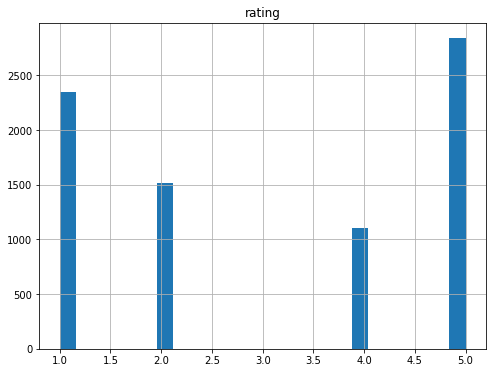

In [16]:
# visualize the distribution of rating
df_data.hist(bins=25, figsize=(8,6))
plt.show()

In [17]:
# print total number of unique values of each column
for col in df_data:
    print(col, df_data[col].nunique())

asin 6169
product_name 6127
product_type 5
rating 4
title 7517
review_text 7811


In [18]:

df_data['rating'].value_counts()

5.0    2839
1.0    2350
2.0    1515
4.0    1107
Name: rating, dtype: int64

In [19]:

# set the rating number lower or equal to 3 as a negative review and rating number higher than 3 as positive review. label the positive review as 1 and negative review as 0
df_data['rating'] = np.where((df_data['rating'] <= 3), 0, df_data.rating)
df_data['rating'] = np.where((df_data['rating'] > 3), 1, df_data.rating)

In [20]:
df_data

,asin,product_name,product_type,rating,title,review_text
790,B00017UTC6,Ultimate Tub Caddy - Expandable - (Chrome): Ki...,kitchen & housewares,0.0,"Great idea but Rusted fast, pieces fall off !!!","Now, i love the idea of having a chrome tub ca..."
720,B00029LO0Y,"Home on the Range: DVD: G.W. Bailey,Bobby Bloc...",dvd,0.0,Disney's Worst Animated Feature,I first saw the movie poster and wasn't partic...
645,B0007UM8WG,Meet The Fockers (Full Screen Edition): DVD: R...,dvd,0.0,Dreadful and Insulting,"Like other reviewers, I found MeetThe Parents ..."
244,1595230068,"The Truth About Hillary: What She Knew, When S...",books,1.0,AND THIS IS PRESIDENTIAL MATERIAL!,Every page is an eye opener. The author has d...
913,B000090WE9,Panasonic KX-TS105B Corded Speakerphone (Black...,electronics,1.0,Conference... in style,I needed a simple solution for my office. I wa...
...,...,...,...,...,...,...
963,0767911733,Letter Perfect: The Marvelous History of Our A...,books,0.0,Misinformation and Euro-centric,You can tell I don't pay attention to Wall Str...
543,0312971230,Ice Station: Books: Matthew Reilly,books,1.0,Fasten Your Seatbelts and Enjoy the Ride!,I stumbled upon Matthew Reilly's novel in...
293,B000ASGVGO,Back to Basics Egg & Muffin Toaster - TEM500: ...,kitchen & housewares,0.0,Fatal Flaw,I've had this appliance since just before Than...
488,B00009WE4L,Metrokane Rabbit Lever Vacuum Pump: Kitchen & ...,kitchen & housewares,0.0,This item does not work,This product simply does not work. The vacuum...


In [21]:
# count the words number of review_text column
df_data['word_count'] = df_data['review_text'].apply(lambda x: len(str(x.split())))

In [22]:
df_data.head()

,asin,product_name,product_type,rating,title,review_text,word_count
790,B00017UTC6,Ultimate Tub Caddy - Expandable - (Chrome): Ki...,kitchen & housewares,0.0,"Great idea but Rusted fast, pieces fall off !!!","Now, i love the idea of having a chrome tub ca...",442
720,B00029LO0Y,"Home on the Range: DVD: G.W. Bailey,Bobby Bloc...",dvd,0.0,Disney's Worst Animated Feature,I first saw the movie poster and wasn't partic...,660
645,B0007UM8WG,Meet The Fockers (Full Screen Edition): DVD: R...,dvd,0.0,Dreadful and Insulting,"Like other reviewers, I found MeetThe Parents ...",217
244,1595230068,"The Truth About Hillary: What She Knew, When S...",books,1.0,AND THIS IS PRESIDENTIAL MATERIAL!,Every page is an eye opener. The author has d...,198
913,B000090WE9,Panasonic KX-TS105B Corded Speakerphone (Black...,electronics,1.0,Conference... in style,I needed a simple solution for my office. I wa...,906


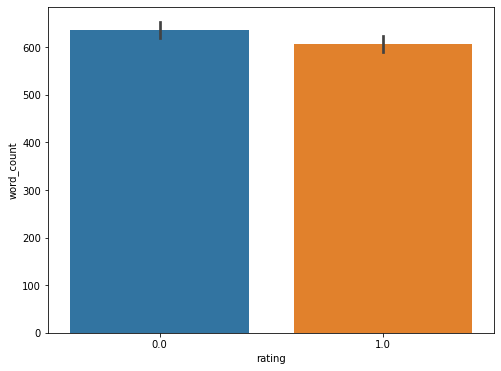

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='rating', y='word_count', data=df_data)
plt.show()

In [24]:
import nltk
import string
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
Stop = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [25]:

print(Stop)

{'from', 'so', 'don', 'wasn', 'was', 'be', 'o', 'does', 'we', 'won', 'needn', 'now', 'by', 'then', 'not', 'over', 'against', 'when', 'same', 'of', "it's", 'only', 'any', "you've", 'its', "she's", 'an', 'during', 'you', "you'd", 'our', 'as', 'll', 'own', "you're", 'there', 'above', 'who', 'did', 'doing', 'he', 'had', 'ain', 'they', 'about', 'weren', 'each', 'his', 'these', 'with', 't', "couldn't", 're', 've', 'below', 'nor', 'but', 'it', 'more', 'again', 'down', 'some', 'if', 'isn', 'haven', 'or', 'a', 'your', 'myself', 'ours', 'mightn', 'than', 'me', 'have', "didn't", 'y', "shan't", 'and', 'how', 'has', 'for', 'too', 'yourself', 'himself', 'between', 'shouldn', 'those', 'i', 'are', "mustn't", 'should', 'until', 'further', 'theirs', 'him', 'once', 'before', 'ourselves', 'after', 'd', 'herself', 'couldn', "needn't", 'them', 'ma', 'my', 'do', 'wouldn', 'why', 'at', 'up', "don't", 'here', 'were', "shouldn't", 'whom', 'am', 'mustn', 'having', 'while', 'very', 'into', 'yours', 'to', "isn't",

In [26]:
# a funtion that use to remove the emoji in the review text
def remove_emoji(text):
    regrex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return regrex_pattern.sub(r'',text)

# a function use to clean the review text 
def clean_data(text):
    review = [remove_emoji(text) for text in text] # remove the emoji first
    review = [text.lower() for text in review]# turn every capitalization to lowercase
    review = [re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) for text in review] # eliminate the punctuation, URL, and @
    review = [text.strip() for text in review] # remove extra space
    
    # stop words
    filtered_review = []
    for text in review:
        tokens = [text for text in word_tokenize(text) if not text in Stop]
        filtered_review.append(" ".join(tokens))
    
#     stem_review = []
#     for text in filtered_review:
#         stem_review.append(" ".join(list(map(stemmer.stem , word_tokenize(text)))))
    
    # Lemmatization the review text: converting a word to its base form.
    lem_review = []
    for text in filtered_review:
        lem_review.append(" ".join(list(map(lemmatizer.lemmatize , word_tokenize(text)))))

    return lem_review
    


In [27]:
df_data['review_text'] = clean_data(df_data['review_text'])

In [28]:
# add a column of counted words after cleaned
df_data['word_count_cleaned'] = df_data['review_text'].apply(lambda x: len(str(x.split())))

In [29]:
df_data

,asin,product_name,product_type,rating,title,review_text,word_count,word_count_cleaned
790,B00017UTC6,Ultimate Tub Caddy - Expandable - (Chrome): Ki...,kitchen & housewares,0.0,"Great idea but Rusted fast, pieces fall off !!!",love idea chrome tub caddy 2 month begain rust...,442,210
720,B00029LO0Y,"Home on the Range: DVD: G.W. Bailey,Bobby Bloc...",dvd,0.0,Disney's Worst Animated Feature,first saw movie poster wasnt particlularly ins...,660,393
645,B0007UM8WG,Meet The Fockers (Full Screen Edition): DVD: R...,dvd,0.0,Dreadful and Insulting,like reviewer found meetthe parent mildly amus...,217,123
244,1595230068,"The Truth About Hillary: What She Knew, When S...",books,1.0,AND THIS IS PRESIDENTIAL MATERIAL!,every page eye opener author done excellent jo...,198,122
913,B000090WE9,Panasonic KX-TS105B Corded Speakerphone (Black...,electronics,1.0,Conference... in style,needed simple solution office wanted able use ...,906,521
...,...,...,...,...,...,...,...,...
963,0767911733,Letter Perfect: The Marvelous History of Our A...,books,0.0,Misinformation and Euro-centric,tell dont pay attention wall street journal ne...,291,185
543,0312971230,Ice Station: Books: Matthew Reilly,books,1.0,Fasten Your Seatbelts and Enjoy the Ride!,stumbled upon matthew reillys novel new releas...,438,255
293,B000ASGVGO,Back to Basics Egg & Muffin Toaster - TEM500: ...,kitchen & housewares,0.0,Fatal Flaw,ive appliance since thanksgiving able fully us...,140,78
488,B00009WE4L,Metrokane Rabbit Lever Vacuum Pump: Kitchen & ...,kitchen & housewares,0.0,This item does not work,product simply work vacuum weak preserve wine ...,643,334


In [30]:
# add a column called sentiment. if rating equal to 1, set the sentiment to positive, if rating equal to 0, set the sentiment to negative
df_data["sentiment"] = df_data["rating"].apply(lambda x: 'Positive' if x == 1.0 else 'Negative')

In [31]:
df_data

,asin,product_name,product_type,rating,title,review_text,word_count,word_count_cleaned,sentiment
790,B00017UTC6,Ultimate Tub Caddy - Expandable - (Chrome): Ki...,kitchen & housewares,0.0,"Great idea but Rusted fast, pieces fall off !!!",love idea chrome tub caddy 2 month begain rust...,442,210,Negative
720,B00029LO0Y,"Home on the Range: DVD: G.W. Bailey,Bobby Bloc...",dvd,0.0,Disney's Worst Animated Feature,first saw movie poster wasnt particlularly ins...,660,393,Negative
645,B0007UM8WG,Meet The Fockers (Full Screen Edition): DVD: R...,dvd,0.0,Dreadful and Insulting,like reviewer found meetthe parent mildly amus...,217,123,Negative
244,1595230068,"The Truth About Hillary: What She Knew, When S...",books,1.0,AND THIS IS PRESIDENTIAL MATERIAL!,every page eye opener author done excellent jo...,198,122,Positive
913,B000090WE9,Panasonic KX-TS105B Corded Speakerphone (Black...,electronics,1.0,Conference... in style,needed simple solution office wanted able use ...,906,521,Positive
...,...,...,...,...,...,...,...,...,...
963,0767911733,Letter Perfect: The Marvelous History of Our A...,books,0.0,Misinformation and Euro-centric,tell dont pay attention wall street journal ne...,291,185,Negative
543,0312971230,Ice Station: Books: Matthew Reilly,books,1.0,Fasten Your Seatbelts and Enjoy the Ride!,stumbled upon matthew reillys novel new releas...,438,255,Positive
293,B000ASGVGO,Back to Basics Egg & Muffin Toaster - TEM500: ...,kitchen & housewares,0.0,Fatal Flaw,ive appliance since thanksgiving able fully us...,140,78,Negative
488,B00009WE4L,Metrokane Rabbit Lever Vacuum Pump: Kitchen & ...,kitchen & housewares,0.0,This item does not work,product simply work vacuum weak preserve wine ...,643,334,Negative


In [32]:
# convert the categorical values to numeric using the factorize() method. returns an array of numeric values and an index of categories.
sentiment_label = df_data.sentiment.factorize()
sentiment_label


(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['Negative', 'Positive'], dtype='object'))

In [33]:
# retrive all review_text data from dataset
review_text = df_data.review_text.values
review_text

array(['love idea chrome tub caddy 2 month begain rust candle holder wine glass holder rusted looking plastic covered tub caddy caddy awesome chrome',
       'first saw movie poster wasnt particlularly inspired idea cow going evil cow rustler heard composer alan menken worked beauty beast aladdin attached made rethink position unfortunately trailer made rethink position back still went movie theater ready give home range chance',
       'like reviewer found meetthe parent mildly amusing sequel 3 25 bin hollywood figured',
       ..., 'ive appliance since thanksgiving able fully use twice',
       'product simply work vacuum weak preserve wine even day used vacuvin many year far superior product far lower cost bought item appeared easier pump vacuvin reason doesnt preserve wine seeking return refund either amazon metrokane',
       'well wrote review set boy disappointed got see company produced must paid little royalty numerous silent episode one lesser caracters 1 disc spanky alfalfa 

In [34]:
# tokenize all the words in the text
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_text)
vocab_size = len(tokenizer.word_index) + 1

In [35]:
# replace the words with their assigned numbers
encoded_text = tokenizer.texts_to_sequences(review_text)

In [36]:
# Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.
from keras.preprocessing.sequence import pad_sequences
padded_text = pad_sequences(encoded_text, maxlen=200)
padded_text

array([[   0,    0,    0, ..., 1679,  642, 3617],
       [   0,    0,    0, ...,  189,  610,  611],
       [   0,    0,    0, ..., 3618,  829, 1131],
       ...,
       [   0,    0,    0, ..., 1606,   13,  651],
       [   0,    0,    0, ...,  740,  234,  123],
       [   0,    0,    0, ...,   13,  228,   76]], dtype=int32)

In [37]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from keras.layers import Embedding

# create a model
def model_builder():
  embedding_vector_length = 32
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
  model.add(SpatialDropout1D(0.25))
  model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

  return model



In [38]:
model = model_builder()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           907744    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 924,395
Trainable params: 924,395
Non-trainable params: 0
__________________________________________________

In [39]:
# train the model
history = model.fit(padded_text,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
196/196 [==============================] - 287s 1s/step - loss: 0.6421 - accuracy: 0.6228 - val_loss: 0.5455 - val_accuracy: 0.7217
Epoch 2/5
196/196 [==============================] - 283s 1s/step - loss: 0.4469 - accuracy: 0.7900 - val_loss: 0.5144 - val_accuracy: 0.7671
Epoch 3/5
196/196 [==============================] - 272s 1s/step - loss: 0.3618 - accuracy: 0.8414 - val_loss: 0.5073 - val_accuracy: 0.7678
Epoch 4/5
196/196 [==============================] - 276s 1s/step - loss: 0.3056 - accuracy: 0.8718 - val_loss: 0.5590 - val_accuracy: 0.7601
Epoch 5/5
196/196 [==============================] - 274s 1s/step - loss: 0.2735 - accuracy: 0.8862 - val_loss: 0.6389 - val_accuracy: 0.7562


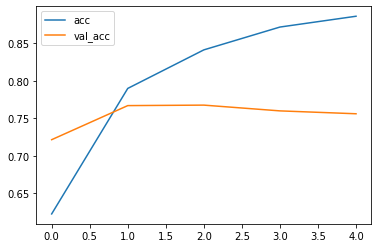

In [40]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

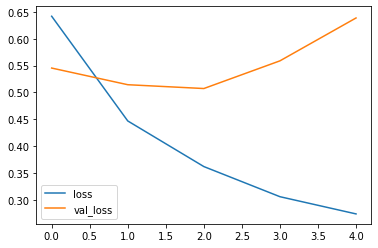

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [42]:
# a funtion that use to predict the sentiment of a review
def predict_sentiment(text):
  tokenizer = Tokenizer(num_words=5000)
  tw = tokenizer.texts_to_sequences([text])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  return sentiment_label[1][prediction]

In [43]:
# try to predict a review text and print the result
test = predict_sentiment("Not only do I disagree with his opinions, but some of his facts are blatently false.  On page 106 he refers to violence agains Native Americans by European settlers as isolated instances and not planned nor calculated.  Had to read it for a class and it was less then enjoyable")
test

'Negative'

In [44]:
# save the model
model.save("myModel.h5")

In [45]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok
!ngrok authtoken 28jlhhwe9bxxZ4cmZjATI9h7lnL_6zdxg1j3KHWyC2gz1Cu6m


  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=6105d6da4b740367c627ddfb3cd24cba88d4c45610ee2eb2538734ecdd087e22
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [46]:
# please up load the templates zip file here
from google.colab import files
uploaded = files.upload()

Saving templates.zip to templates.zip


In [47]:
# unzip the template file
import zipfile
from zipfile import ZipFile

file_name = 'templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [ ]:
import flask
from flask import Flask, render_template, request
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from flask_ngrok import run_with_ngrok
from keras.models import load_model
import nltk

tokenizer = Tokenizer(num_words=5000)

# initialize a Flask 
app = Flask(__name__)
run_with_ngrok(app)
model = load_model('myModel.h5')

# load the html page
@app.route('/')
def index_view():
    return render_template('home.html')

@app.route('/',methods=['POST'])
def my_form_post():    

    text = request.form['text']
    nltk.download('vader_lexicon')
    sentiment = predict_sentiment(text)
    

    if(sentiment == 'Positive'):
        label = 'This review is positive'
    elif(sentiment == 'Negative'):
        label = 'This review is negative'

    return(render_template('home.html', variable=label))


# run the html page and click the second url(the one ended by ngrok.io)
# if the google chrome shows the safety alert, please click the detail-show more-continue to this website
# if the page is fail to connect, please reload for several times.
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://980f-34-122-184-60.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [05/May/2022 09:42:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:42:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:43:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:43:03] "GET /favicon.ico HTTP/1.1" 404 -


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


127.0.0.1 - - [05/May/2022 09:43:13] "POST / HTTP/1.1" 200 -
